In [47]:
import pandas as pd
import sklearn as skl 
import numpy as np
import matplotlib.pyplot as plt 

In [48]:
data = pd.read_json("dataset_final.json")
data

,track_name,artists,year,region,country_code,image,preview,duration_fmt,popularity,danceability,energy,tempo,track_genre
0,Comedy,Gen Hoshino,2022,Asie,JP,https://i.scdn.co/image/ab67616d0000b27326573d...,NaN,3:50,73,0.676,0.4610,87.917,acoustic
1,Ghost - Acoustic,Ben Woodward,2021,Reste du Monde,QZ,https://i.scdn.co/image/ab67616d0000b273935a71...,NaN,2:29,55,0.420,0.1660,77.489,acoustic
2,To Begin Again,Ingrid Michaelson;ZAYN,2021,Amérique du Nord,US,https://i.scdn.co/image/ab67616d0000b273ed344b...,NaN,3:30,57,0.438,0.3590,76.332,acoustic
3,Can't Help Falling In Love,Kina Grannis,2018,Amérique du Nord,US,https://i.scdn.co/image/ab67616d0000b273bb3df7...,NaN,3:21,71,0.266,0.0596,181.740,acoustic
4,Hold On,Chord Overstreet,2017,Amérique du Nord,US,https://i.scdn.co/image/ab67616d0000b273c60473...,NaN,3:18,82,0.618,0.4430,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49270,Stay (You Are Good) - Live,Planetshakers,2022,Reste du Monde,QZ,https://i.scdn.co/image/ab67616d0000b273098060...,NaN,7:42,38,0.296,0.7620,139.051,world-music
49271,At The Cross (Love Ran Red),Chris Tomlin,2016,Amérique du Nord,US,https://i.scdn.co/image/ab67616d0000b273e7493d...,NaN,4:10,32,0.387,0.5310,146.003,world-music
49272,Your Love Never Fails,Jesus Culture,2013,Amérique du Nord,US,https://i.scdn.co/image/ab67616d0000b27305ef5f...,NaN,5:12,38,0.475,0.8600,113.949,world-music
49273,How Can I Keep From Singing,Chris Tomlin,2006,Amérique du Nord,US,https://i.scdn.co/image/ab67616d0000b273c3d0a5...,NaN,4:16,39,0.505,0.6870,104.083,world-music


In [49]:
donnee = data.drop(columns=["preview", "image"],).copy()

In [50]:
donnee

,track_name,artists,year,region,country_code,duration_fmt,popularity,danceability,energy,tempo,track_genre
0,Comedy,Gen Hoshino,2022,Asie,JP,3:50,73,0.676,0.4610,87.917,acoustic
1,Ghost - Acoustic,Ben Woodward,2021,Reste du Monde,QZ,2:29,55,0.420,0.1660,77.489,acoustic
2,To Begin Again,Ingrid Michaelson;ZAYN,2021,Amérique du Nord,US,3:30,57,0.438,0.3590,76.332,acoustic
3,Can't Help Falling In Love,Kina Grannis,2018,Amérique du Nord,US,3:21,71,0.266,0.0596,181.740,acoustic
4,Hold On,Chord Overstreet,2017,Amérique du Nord,US,3:18,82,0.618,0.4430,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...
49270,Stay (You Are Good) - Live,Planetshakers,2022,Reste du Monde,QZ,7:42,38,0.296,0.7620,139.051,world-music
49271,At The Cross (Love Ran Red),Chris Tomlin,2016,Amérique du Nord,US,4:10,32,0.387,0.5310,146.003,world-music
49272,Your Love Never Fails,Jesus Culture,2013,Amérique du Nord,US,5:12,38,0.475,0.8600,113.949,world-music
49273,How Can I Keep From Singing,Chris Tomlin,2006,Amérique du Nord,US,4:16,39,0.505,0.6870,104.083,world-music


In [51]:
donnee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49275 entries, 0 to 49274
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    49275 non-null  object 
 1   artists       49275 non-null  object 
 2   year          49275 non-null  int64  
 3   region        49275 non-null  object 
 4   country_code  49275 non-null  object 
 5   duration_fmt  49275 non-null  object 
 6   popularity    49275 non-null  int64  
 7   danceability  49275 non-null  float64
 8   energy        49275 non-null  float64
 9   tempo         49275 non-null  float64
 10  track_genre   49275 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.1+ MB


In [52]:
def minute_convert(x):
    data =str(x)
    data = data.split(":")
    return int(data[0]) + int(data[1])/60


In [53]:
donnee["duration_fmt"] = donnee["duration_fmt"].apply(minute_convert)

In [54]:
donnee

,track_name,artists,year,region,country_code,duration_fmt,popularity,danceability,energy,tempo,track_genre
0,Comedy,Gen Hoshino,2022,Asie,JP,3.833333,73,0.676,0.4610,87.917,acoustic
1,Ghost - Acoustic,Ben Woodward,2021,Reste du Monde,QZ,2.483333,55,0.420,0.1660,77.489,acoustic
2,To Begin Again,Ingrid Michaelson;ZAYN,2021,Amérique du Nord,US,3.500000,57,0.438,0.3590,76.332,acoustic
3,Can't Help Falling In Love,Kina Grannis,2018,Amérique du Nord,US,3.350000,71,0.266,0.0596,181.740,acoustic
4,Hold On,Chord Overstreet,2017,Amérique du Nord,US,3.300000,82,0.618,0.4430,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...
49270,Stay (You Are Good) - Live,Planetshakers,2022,Reste du Monde,QZ,7.700000,38,0.296,0.7620,139.051,world-music
49271,At The Cross (Love Ran Red),Chris Tomlin,2016,Amérique du Nord,US,4.166667,32,0.387,0.5310,146.003,world-music
49272,Your Love Never Fails,Jesus Culture,2013,Amérique du Nord,US,5.200000,38,0.475,0.8600,113.949,world-music
49273,How Can I Keep From Singing,Chris Tomlin,2006,Amérique du Nord,US,4.266667,39,0.505,0.6870,104.083,world-music


In [55]:
donnee["track_genre"].value_counts()

track_genre
forro        998
anime        951
chill        916
k-pop        907
brazil       904
            ... 
reggaeton     70
tango         37
grindcore     14
romance       13
iranian        2
Name: count, Length: 113, dtype: int64

In [56]:
num_data = donnee.select_dtypes(np.number)
corelation = num_data.corr()
corelation["popularity"].sort_values(ascending=False)

popularity      1.000000
danceability    0.068285
tempo          -0.023793
energy         -0.027287
year           -0.050038
duration_fmt   -0.059903
Name: popularity, dtype: float64

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'duration_fmt'}>],
       [<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

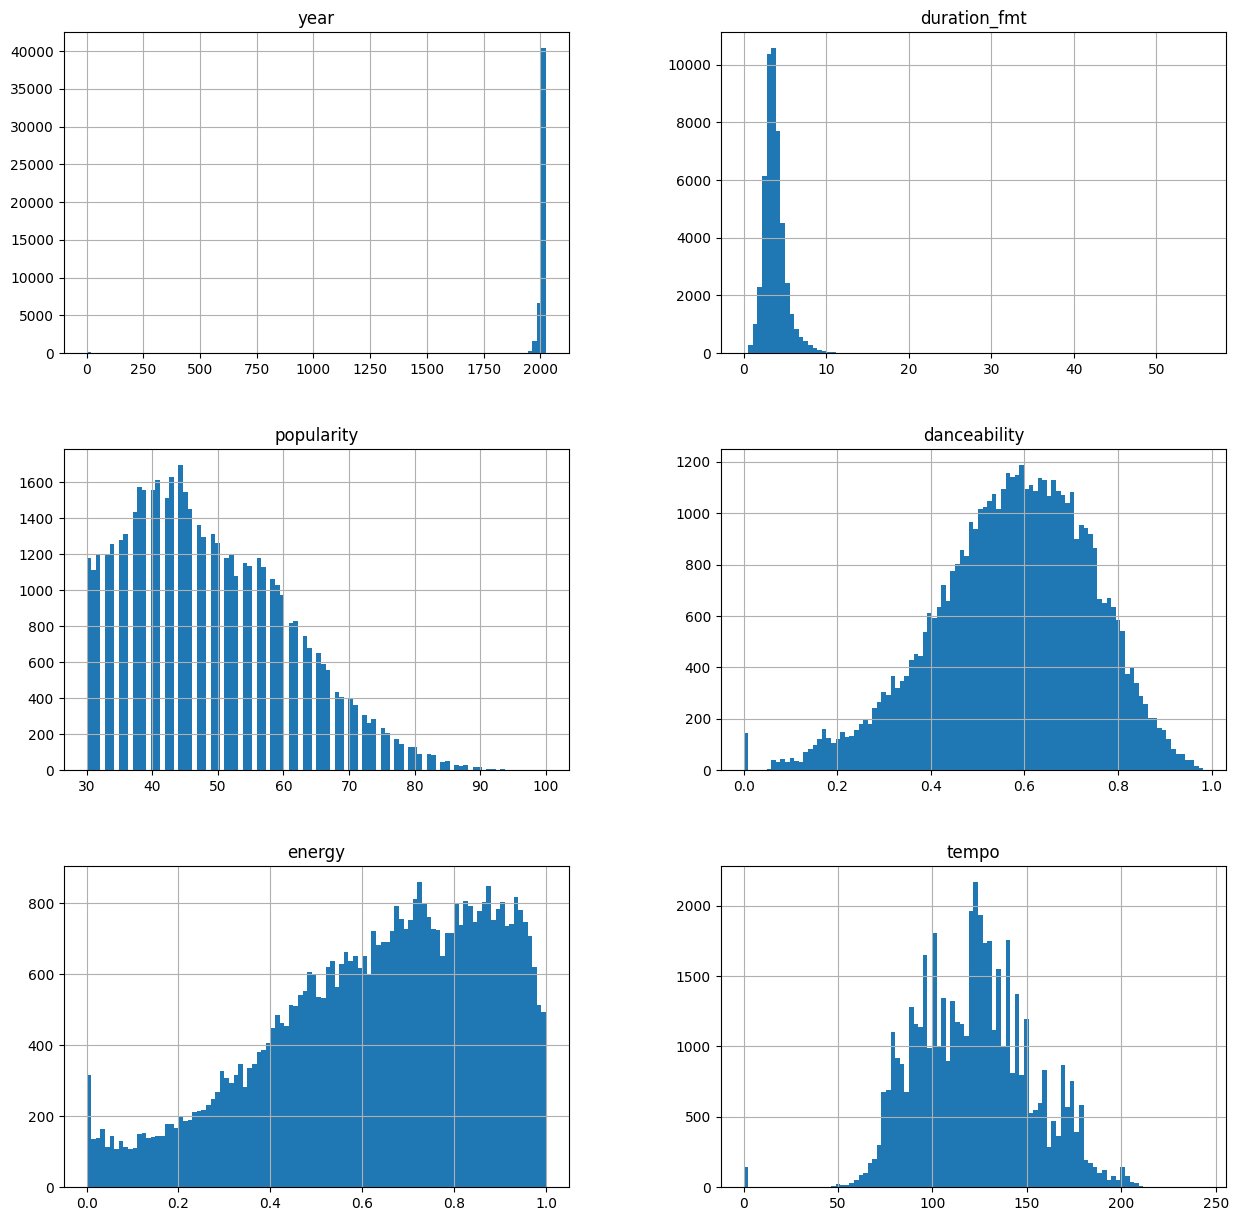

In [57]:
donnee.hist(figsize=(15,15), bins=100, )

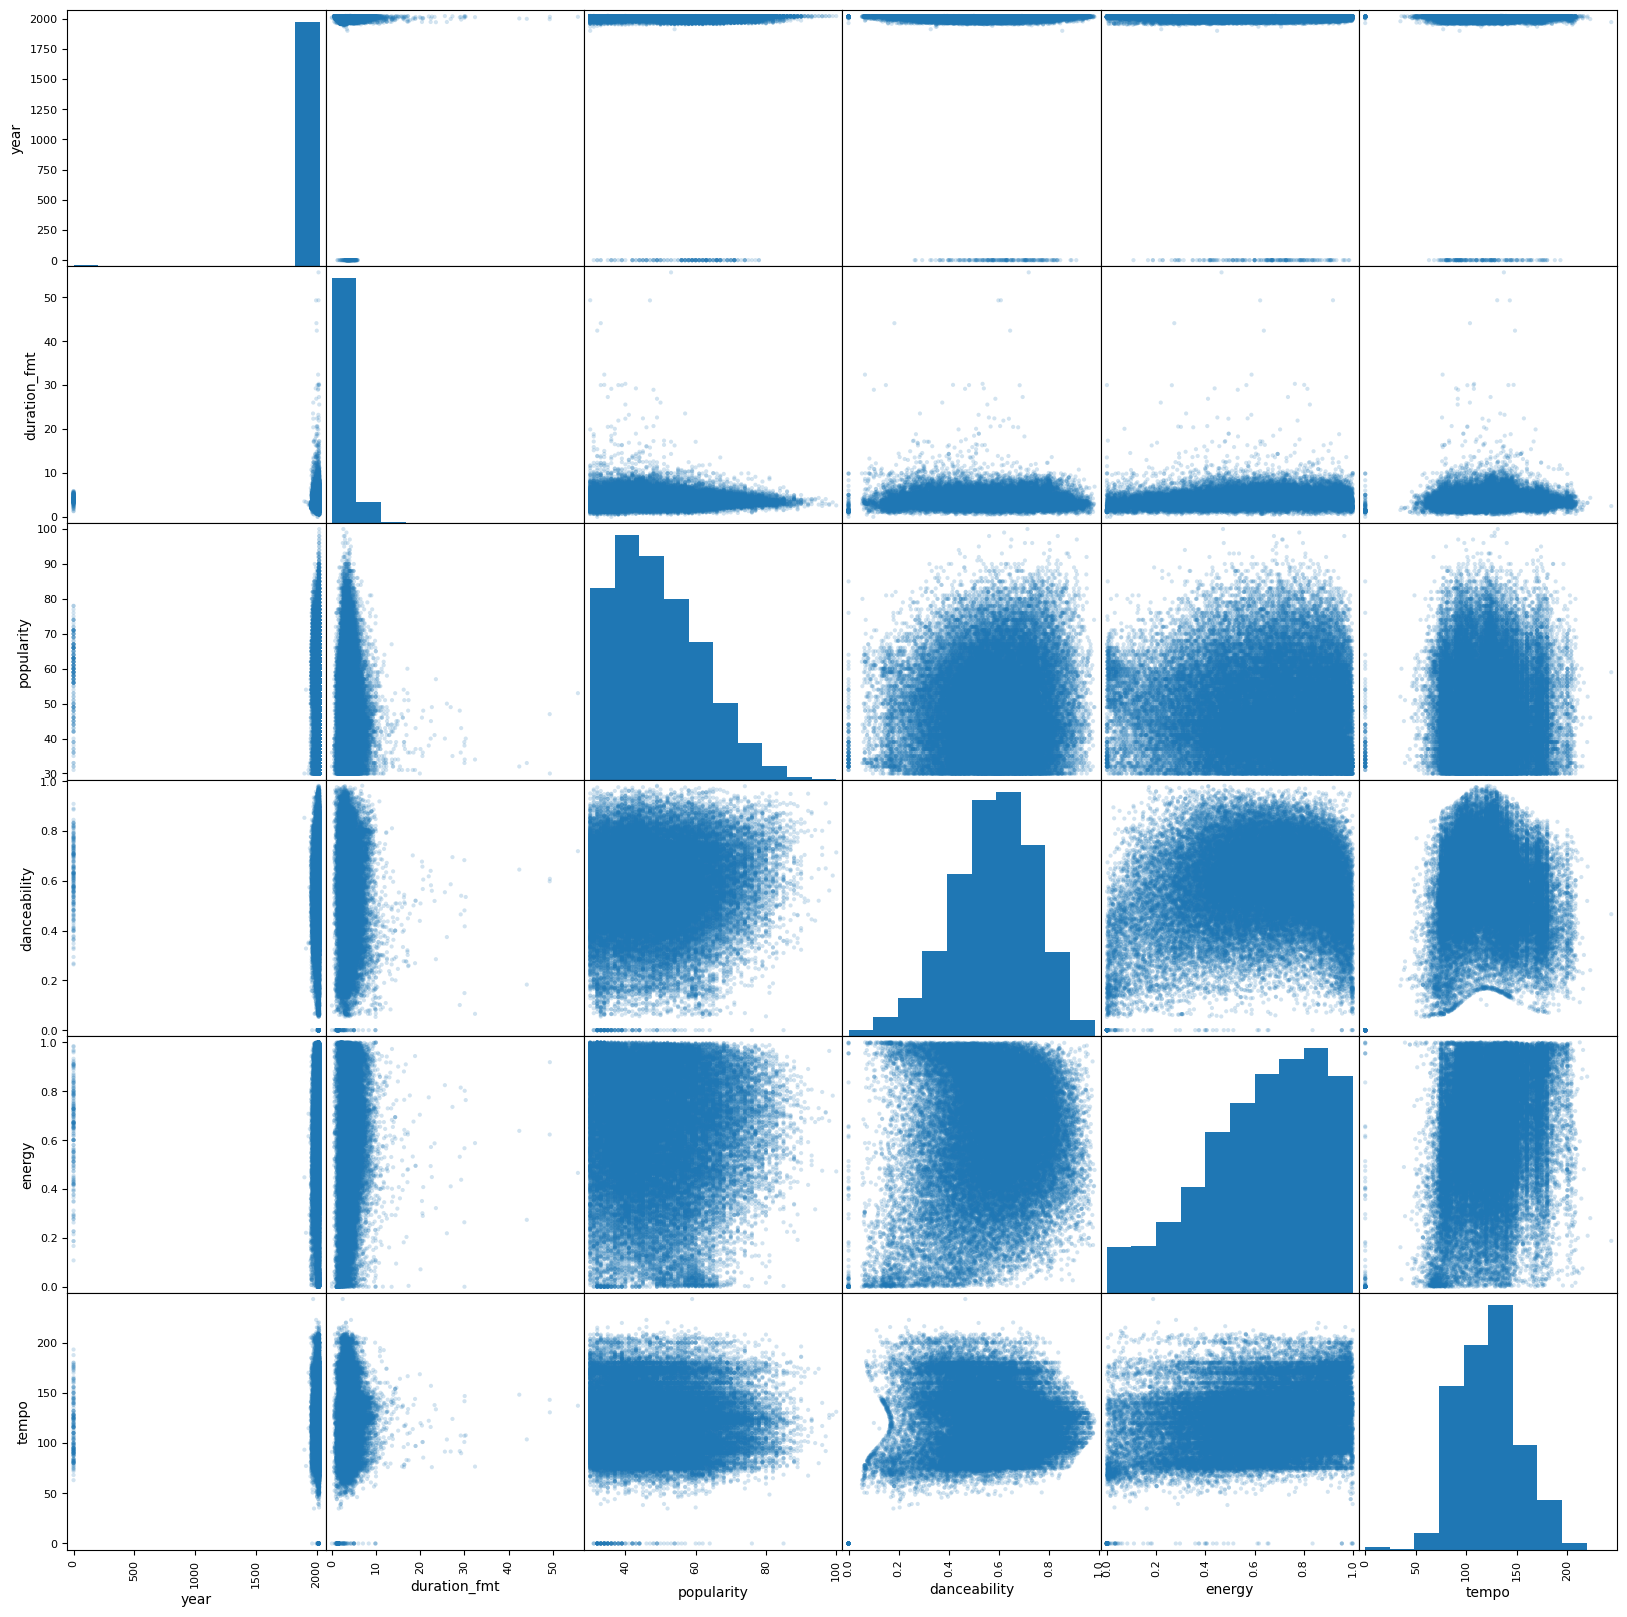

In [58]:
from pandas.plotting import scatter_matrix
ploting = scatter_matrix(num_data, figsize=(20,20), alpha=0.2)

(1900.0, 2028.0)

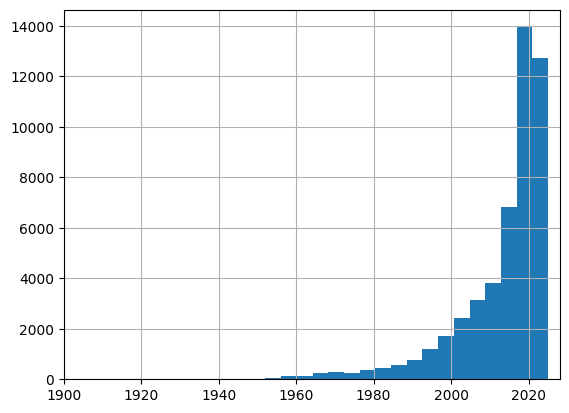

In [59]:
donnee["year"].hist(bins=500)
plt.xlim(1900, 2028)

In [60]:
donnee["year_dist"] =pd.cut(donnee["year"], bins=[0., 1990, 2010, np.inf], labels= [1, 2, 3] , include_lowest=True)

<Axes: xlabel='year_dist'>

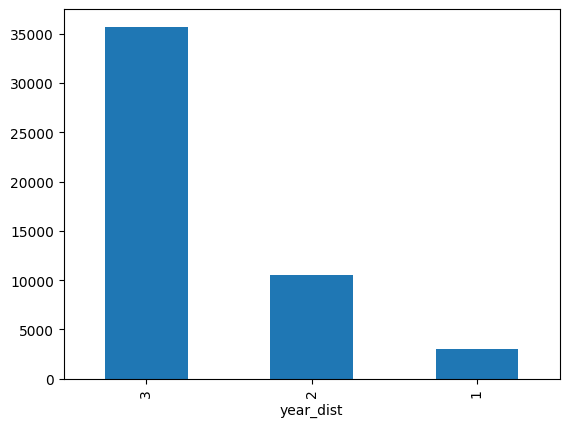

In [61]:
donnee["year_dist"].value_counts().plot.bar()

(0.0, 10.0)

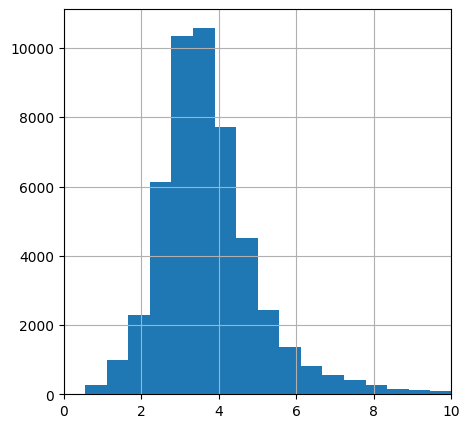

In [62]:
donnee["duration_fmt"].hist(bins=100 ,figsize=(5,5))
plt.xlim(0, 10)

In [63]:
donnee["duree_dist"] =pd.cut(donnee["duration_fmt"], bins=[0., 2.5, 4., 6. ,np.inf], labels= [1, 2, 3, 4], include_lowest=True)

<Axes: xlabel='duree_dist'>

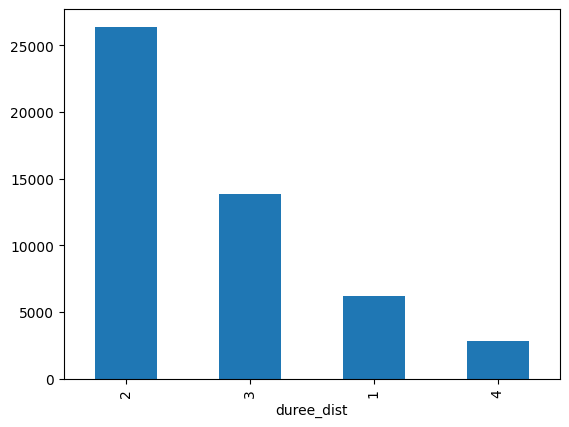

In [64]:
donnee["duree_dist"].value_counts().plot.bar()

<Axes: >

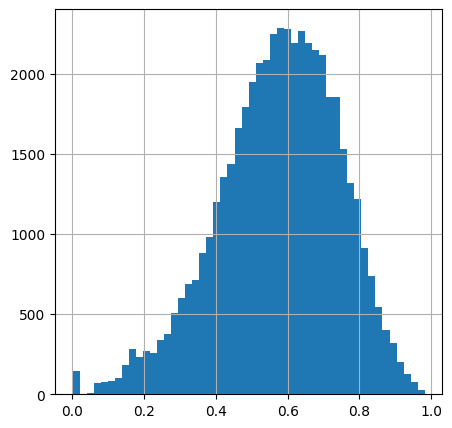

In [65]:
donnee["danceability"].hist(bins=50 ,figsize=(5,5))

In [66]:
donnee["danceability_dist"] =pd.cut(donnee["danceability"], bins=[0., 0.5, 0.8,np.inf], labels= [1, 2, 3], include_lowest=True)

<Axes: xlabel='danceability_dist'>

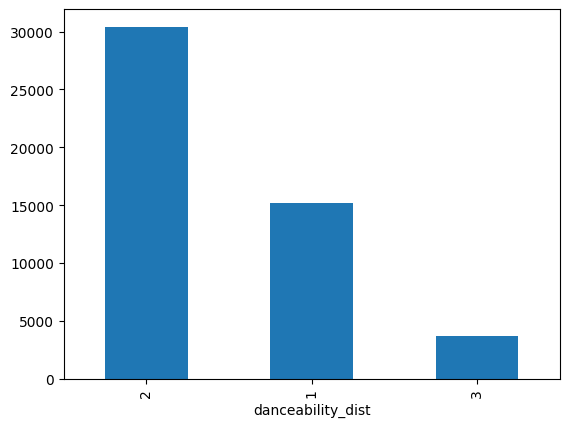

In [67]:
donnee["danceability_dist"].value_counts().plot.bar()

In [68]:
donnee

,track_name,artists,year,region,country_code,duration_fmt,popularity,danceability,energy,tempo,track_genre,year_dist,duree_dist,danceability_dist
0,Comedy,Gen Hoshino,2022,Asie,JP,3.833333,73,0.676,0.4610,87.917,acoustic,3,2,2
1,Ghost - Acoustic,Ben Woodward,2021,Reste du Monde,QZ,2.483333,55,0.420,0.1660,77.489,acoustic,3,1,1
2,To Begin Again,Ingrid Michaelson;ZAYN,2021,Amérique du Nord,US,3.500000,57,0.438,0.3590,76.332,acoustic,3,2,1
3,Can't Help Falling In Love,Kina Grannis,2018,Amérique du Nord,US,3.350000,71,0.266,0.0596,181.740,acoustic,3,2,1
4,Hold On,Chord Overstreet,2017,Amérique du Nord,US,3.300000,82,0.618,0.4430,119.949,acoustic,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49270,Stay (You Are Good) - Live,Planetshakers,2022,Reste du Monde,QZ,7.700000,38,0.296,0.7620,139.051,world-music,3,4,1
49271,At The Cross (Love Ran Red),Chris Tomlin,2016,Amérique du Nord,US,4.166667,32,0.387,0.5310,146.003,world-music,3,3,1
49272,Your Love Never Fails,Jesus Culture,2013,Amérique du Nord,US,5.200000,38,0.475,0.8600,113.949,world-music,3,3,1
49273,How Can I Keep From Singing,Chris Tomlin,2006,Amérique du Nord,US,4.266667,39,0.505,0.6870,104.083,world-music,2,3,2


In [69]:
donnee["strat_label"] = (
    donnee["year_dist"].astype(str) + "_" +
    donnee["duree_dist"].astype(str) + "_" +
    donnee["danceability_dist"].astype(str)
)


In [70]:
corelation["duration_fmt"]

year           -0.017804
duration_fmt    1.000000
popularity     -0.059903
danceability   -0.113190
energy          0.067063
tempo           0.028203
Name: duration_fmt, dtype: float64

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit
liste_donnee = []
splitter = StratifiedShuffleSplit(random_state=42, n_splits=10, test_size=0.2 , train_size=0.8)
for train_index, test_index in splitter.split(donnee.drop(columns=["year_dist", "duree_dist", "danceability_dist", "strat_label"]), donnee["duree_dist"]):
    train_data = donnee.iloc[train_index]
    test_data = donnee.iloc[test_index]
    liste_donnee.append((train_data.drop(columns=["year_dist", "duree_dist", "danceability_dist", "strat_label"]), test_data.drop(columns=["year_dist", "duree_dist", "danceability_dist", "strat_label"])))

In [72]:
%store liste_donnee

Stored 'liste_donnee' (list)


In [73]:
liste_donnee[0][0]


,track_name,artists,year,region,country_code,duration_fmt,popularity,danceability,energy,tempo,track_genre
13210,Industrial Strain,Koven,2022,Amérique du Nord,CA,3.766667,51,0.398,0.9100,173.933,dub
20813,Archangel,Amaranthe,2020,Europe,DE,3.383333,60,0.407,0.9670,180.027,goth
38391,Buscándote,Yamal and George;George Mayer;Yamal,2021,Reste du Monde,QM,3.216667,38,0.876,0.6210,91.990,reggaeton
32805,"Colors Of The Wind (From ""Pocahontas"")",Danny Wright,2012,Amérique du Nord,US,3.416667,46,0.474,0.0801,67.516,new-age
2712,ODD FUTURE short ver.,UVERworld,2018,Asie,JP,1.483333,56,0.691,0.8950,127.924,anime
...,...,...,...,...,...,...,...,...,...,...,...
3614,You Put The Hurt On Me,The Steeldrivers,2010,Amérique du Nord,US,3.733333,39,0.602,0.2970,98.505,bluegrass
16335,"Kinavo - From ""Manoharam""",Sanjeev T;Shweta Mohan,2019,Asie,IN,3.533333,36,0.533,0.4150,102.759,folk
43450,Sleepy Time,Bedtime Baby,2009,Amérique du Nord,US,2.600000,37,0.466,0.0308,70.179,sleep
12109,Mam tylko ciebie,Mister Dex,1999,Reste du Monde,PL,3.616667,30,0.728,0.9090,130.013,disco


In [75]:
train = liste_donnee[0][0]

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39420 entries, 13210 to 33923
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    39420 non-null  object 
 1   artists       39420 non-null  object 
 2   year          39420 non-null  int64  
 3   region        39420 non-null  object 
 4   country_code  39420 non-null  object 
 5   duration_fmt  39420 non-null  float64
 6   popularity    39420 non-null  int64  
 7   danceability  39420 non-null  float64
 8   energy        39420 non-null  float64
 9   tempo         39420 non-null  float64
 10  track_genre   39420 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 3.6+ MB


In [77]:
train

,track_name,artists,year,region,country_code,duration_fmt,popularity,danceability,energy,tempo,track_genre
13210,Industrial Strain,Koven,2022,Amérique du Nord,CA,3.766667,51,0.398,0.9100,173.933,dub
20813,Archangel,Amaranthe,2020,Europe,DE,3.383333,60,0.407,0.9670,180.027,goth
38391,Buscándote,Yamal and George;George Mayer;Yamal,2021,Reste du Monde,QM,3.216667,38,0.876,0.6210,91.990,reggaeton
32805,"Colors Of The Wind (From ""Pocahontas"")",Danny Wright,2012,Amérique du Nord,US,3.416667,46,0.474,0.0801,67.516,new-age
2712,ODD FUTURE short ver.,UVERworld,2018,Asie,JP,1.483333,56,0.691,0.8950,127.924,anime
...,...,...,...,...,...,...,...,...,...,...,...
3614,You Put The Hurt On Me,The Steeldrivers,2010,Amérique du Nord,US,3.733333,39,0.602,0.2970,98.505,bluegrass
16335,"Kinavo - From ""Manoharam""",Sanjeev T;Shweta Mohan,2019,Asie,IN,3.533333,36,0.533,0.4150,102.759,folk
43450,Sleepy Time,Bedtime Baby,2009,Amérique du Nord,US,2.600000,37,0.466,0.0308,70.179,sleep
12109,Mam tylko ciebie,Mister Dex,1999,Reste du Monde,PL,3.616667,30,0.728,0.9090,130.013,disco


In [78]:
from sklearn.preprocessing import OneHotEncoder
cat_data = train.select_dtypes(np.object_)
cant_data = train.select_dtypes(np.number)
encoder = OneHotEncoder()
encoder.fit(cat_data)

OneHotEncoder()

In [79]:
cat_encode = encoder.transform(cat_data)
cat_encode
%store cat_encode

Stored 'cat_encode' (csr_matrix)


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'duration_fmt'}>],
       [<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

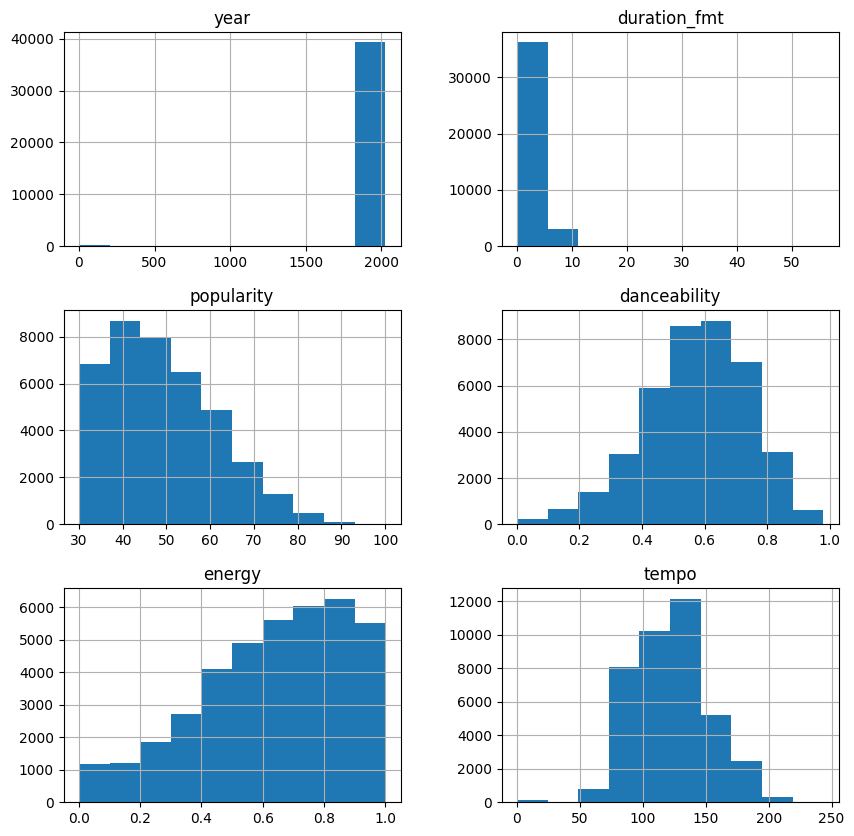

In [80]:
cant_data.hist(figsize=(10,10))

In [88]:
num_data.columns

Index(['year', 'duration_fmt', 'popularity', 'danceability', 'energy',
       'tempo'],
      dtype='object')

In [82]:
from sklearn.preprocessing import FunctionTransformer
expo_fonc = FunctionTransformer(np.log)


In [83]:
from math import log10, exp,log, log1p, log2
a = cant_data["popularity"].apply(lambda x: log10(x))

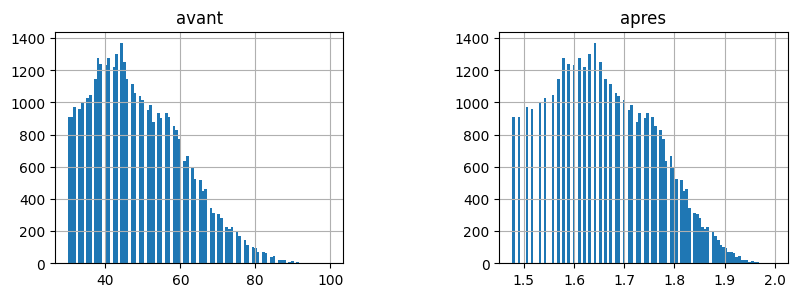

In [84]:
figure, axes = plt.subplots(1,2,figsize=(10,5))
cant_data["popularity"].hist(bins=100, ax= axes[0])
axes[0].set_title("avant")
a.hist(bins=100, ax=axes[1])
axes[1].set_title("apres")
plt.tight_layout(pad=8)


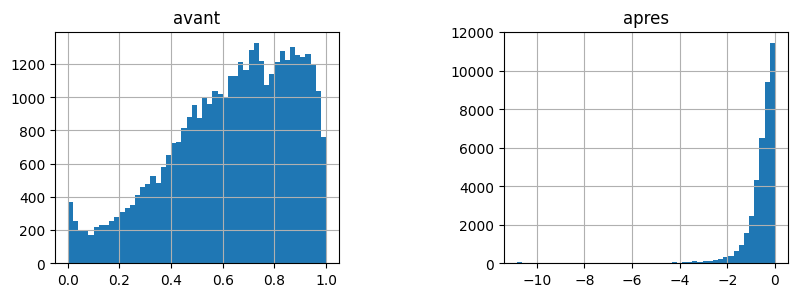

In [85]:
from math import log10, exp,log, log1p, log2
a = cant_data["energy"].apply(lambda x: log(x))
figure, axes = plt.subplots(1,2,figsize=(10,5))
cant_data["energy"].hist(bins=50, ax= axes[0])
axes[0].set_title("avant")
a.hist(bins=50, ax=axes[1])
axes[1].set_title("apres")
plt.tight_layout(pad=8)


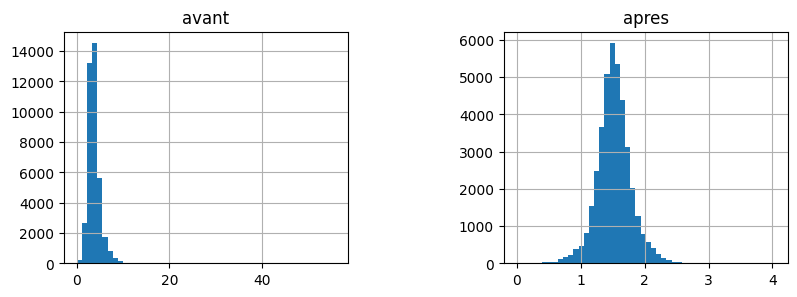

In [87]:
from math import log10, exp,log, log1p, log2
a = cant_data["duration_fmt"].apply(lambda x: log1p(x))
figure, axes = plt.subplots(1,2,figsize=(10,5))
cant_data["duration_fmt"].hist(bins=50, ax= axes[0])
axes[0].set_title("avant")
a.hist(bins=50, ax=axes[1])
axes[1].set_title("apres")
plt.tight_layout(pad=8)
